## Python绘制箱形图分析北京天气数据

#### 箱形图
箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据***分散情况***的统计图。

#### 箱形图的图形组成
对于一组数字，先将其从小到达排列，然后计算图中元素：
<img src="./datas/other_files/ant_boxplot.png" style="width:600px; margin: 0 0;"/>

#### 箱形图的价值
1. 直观明了地识别数据中的异常值
2. 利用箱线图判断数据的偏态和尾重
3. 利用箱线图比较几批数据的形状

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

实例目标：对比北京2019年天气数据中，4个季度的温度分布对比

### 1. 读取北京天气数据

In [2]:
df = pd.read_csv("./datas/beijing_tianqi/beijing_tianqi_2019.csv")

In [3]:
df.head(3)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2019-01-01,1℃,-10℃,晴~多云,西北风,1级,56,良,2
1,2019-01-02,1℃,-9℃,多云,东北风,1级,60,良,2
2,2019-01-03,2℃,-7℃,霾,东北风,1级,165,中度污染,4


### 2. 把温度列从字符串变成数字

In [4]:
# 把最高温度列，从2℃的形式，变成数字
df["bWendu"] = df["bWendu"].str.replace("℃", "").astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ymd        365 non-null    object 
 1   bWendu     365 non-null    float64
 2   yWendu     365 non-null    object 
 3   tianqi     365 non-null    object 
 4   fengxiang  365 non-null    object 
 5   fengli     365 non-null    object 
 6   aqi        365 non-null    int64  
 7   aqiInfo    365 non-null    object 
 8   aqiLevel   365 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 25.8+ KB


### 3. 根据天日期添加季度数字列

In [6]:
# 获取季度数字
df["quarter"] = pd.to_datetime(df["ymd"]).dt.quarter

In [7]:
df.head(6)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,quarter
0,2019-01-01,1.0,-10℃,晴~多云,西北风,1级,56,良,2,1
1,2019-01-02,1.0,-9℃,多云,东北风,1级,60,良,2,1
2,2019-01-03,2.0,-7℃,霾,东北风,1级,165,中度污染,4,1
3,2019-01-04,2.0,-7℃,晴,西北风,2级,50,优,1,1
4,2019-01-05,0.0,-8℃,多云,东北风,2级,29,优,1,1
5,2019-01-06,3.0,-7℃,多云,东南风,1级,84,良,2,1


### 4. 调用seaborn绘制boxplot

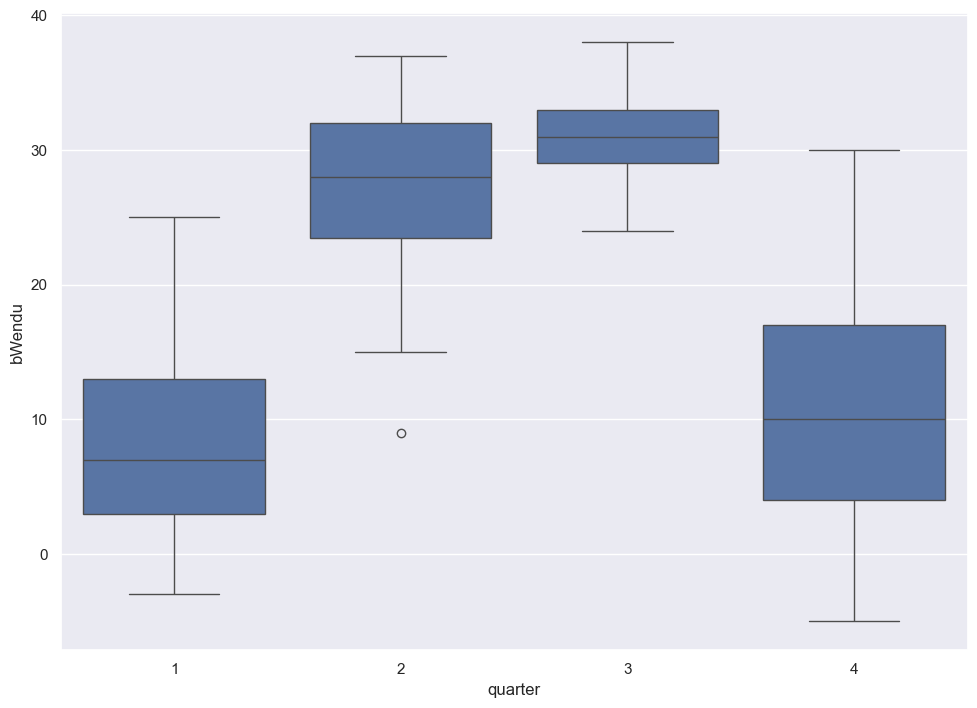

In [8]:
ax = sns.boxplot(x="quarter", y="bWendu", data=df)